**Problema**

A empresa automobilística chinesa Geely Auto aspira entrar no mercado dos Estados Unidos instalando sua unidade de manufatura ali e produzindo carros localmente para competir com empresas americanas e europeias.

Eles contrataram uma empresa de consultoria automotiva para entender os fatores dos quais depende o preço dos carros. Especificamente, eles querem entender os fatores que afetam a precificação dos automóveis no mercado americano, uma vez que podem ser muito diferentes do mercado chinês. A empresa quer saber:

- Quais variáveis são significativas na previsão do preço de um carro
- Quão bem essas variáveis descrevem o preço de um carro


**Objetivo de Negócios**

Você deve modelar o preço dos carros com as variáveis independentes disponíveis. Ele será usado pela administração para entender como exatamente os preços variam com as variáveis independentes. Eles podem, portanto, manipular o design dos carros, a estratégia de negócios, etc para atender a certos níveis de preços. Além disso, o modelo será uma boa maneira para a administração entender a dinâmica de preços de um novo mercado 

**Objetivo de Modelagem**

- Precisamos entender como está o dataset (shape, nulls, etc)
- Fazer pré processamento necessário -> CompanyName está acompanhada do nome do carro; Verificar se há erros de escrita nas categóricas; Processar nulls se tiver; etc
- Criar dummies
- Split dados
- Fazer feature scaling nos dados 
- Fitar modelo usando reg lin
- Analisar modelo, coeficientes e erro

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]

# EDA

*Importação do DataFrame e verificação de informações como:*

- Contagem de valores Nulos
- Formato do DataFrame
- Ortografia das colunas
- Tipos de dados das colunas
- Médias, Medianas e Modas
- Correlações e Covariâncias com Mapas de Calor

In [2]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
#Carro mais barato
cars.loc[cars.price == cars.price.min()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
138,139,2,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0


In [5]:
#Carro mais caro
cars.loc[cars.price == cars.price.max()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.8,3.35,8.0,184,4500,14,16,45400.0


**Extraindo o nome das marcas dos carros para criar a coluna 'brand' a partir dos nomes dos carros na coluna 'CarName'**

In [6]:
cars['brand'] = cars['CarName'].str.split(' ', n=1, expand=True)[0]

In [7]:
#Verificando quais as marcas presentes no DataFrame
#Podemos ver que há erros de digitação em algumas marcas
#volkswagen - vw - vokswagen
#mazda - maxda
#porsche - porcshce
#toyota - toyouta
#Nissan - nissan
cars.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
#Fazendo a correção nas marcas obtidas da célula anterior
cars['brand'].replace({'toyouta' : 'toyota', 'maxda' : 'mazda', 'vokswagen' : 'volkswagen', 'vw':'volkswagen', 'Nissan':'nissan', 'porcshce':'porsche'}, inplace=True)

In [9]:
#Agora as marcas estão com as devidas correções
cars.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
cars.drop(['CarName', 'car_ID'], axis=1, inplace=True)

In [11]:
#pode-se transformar a coluna doornumber em numérica
cars.doornumber.unique()

array(['two', 'four'], dtype=object)

In [12]:
cars.doornumber.replace({'two':2, 'four':4}, inplace=True)

In [13]:
cars.doornumber.dtype

dtype('int64')

In [14]:
cars.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [15]:
cars.cylindernumber.replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}, inplace=True)

In [16]:
cars.cylindernumber.dtype

dtype('int64')

In [17]:
#Verificando se há linhas duplicadas
cars.duplicated().sum()

0

In [18]:
def grafico(df, title, col, rot):
    '''Função para gerar o gráfico para todos os valores filtrados por groupby agregados por valor máximo'''
    fig, ax1 = plt.subplots()
    
    x = np.arange(len(df)) #locais das label das barras
    ax1.bar(x, height=df[col], label=col) #plot da barra
    ax1.set_title(title)
    ax1.set_xticks(x)
    ax1.set_xticklabels(df.index, rotation=rot)
    fig.tight_layout()
    return ax1

def exibe_valores(ax):
    '''Função que exibe os valores de cada barra'''
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext = (0 , 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

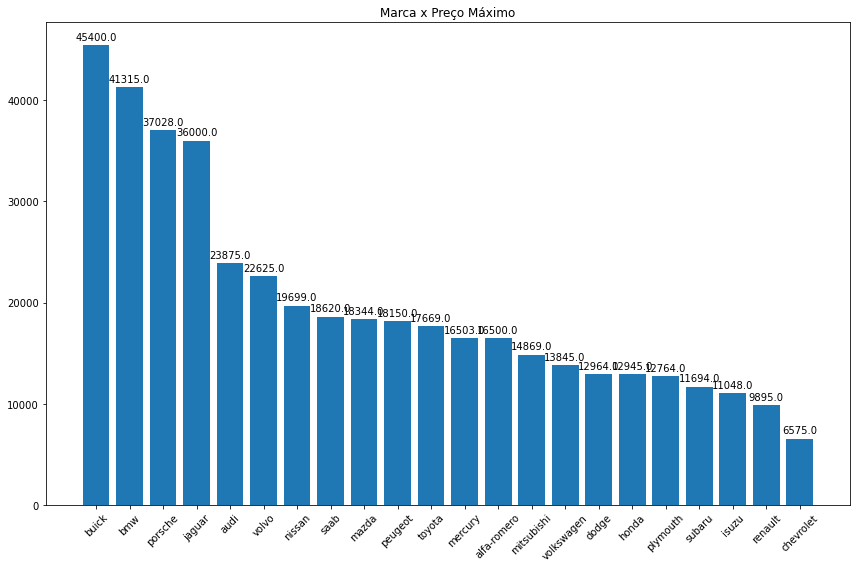

In [19]:
brand_price = pd.DataFrame(cars.groupby(['brand'])['price','horsepower'].max())
title = 'Marca x Preço Máximo'
col = 'price'
rot = 45
x = grafico(brand_price.sort_values(by=col, ascending=False), title, col, rot=rot)
exibe_valores(x)

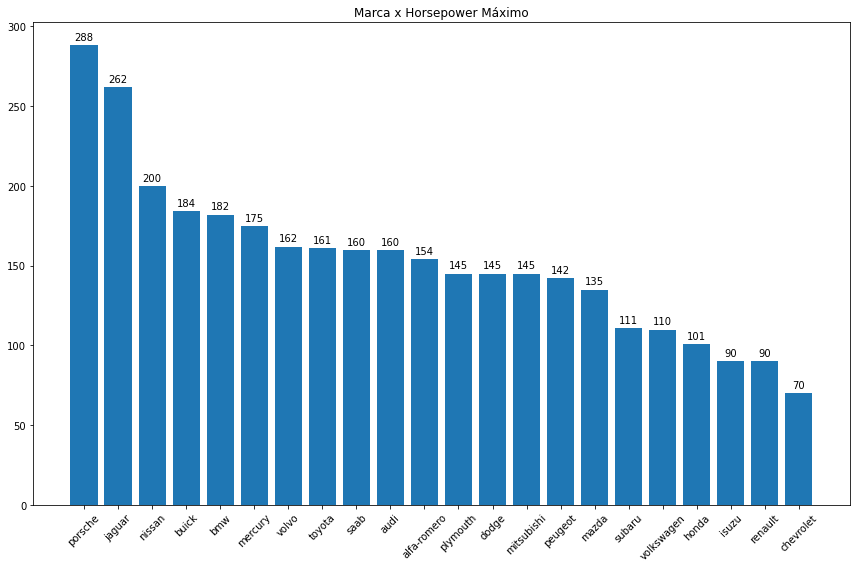

In [20]:
title2 = 'Marca x Horsepower Máximo'
col2 = 'horsepower'
rot = 45
x2 = grafico(brand_price.sort_values(by=col2, ascending=False), title2, col2, rot=rot)
exibe_valores(x2)

In [21]:
#Vamos converter o consumo que está em milhas por galão (mpg) em kilômetros por litro (kml)
#1 mpg é aproximadamente 0,425144, podemos dividir 1 mpg por 2,352, vamos definir uma função para realizar esssa operação

def convertekml(mpg):
    return mpg/2.352

In [22]:
convertekml(20)

8.503401360544219

In [23]:
cars['citykml'] = cars['citympg'].apply(convertekml)

In [24]:
cars['highwaykml'] = cars['highwaympg'].apply(convertekml)

In [25]:
cars.drop(['highwaympg', 'citympg'], axis=1, inplace=True)
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,brand,citykml,highwaykml
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,8.928571,11.479592
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,8.928571,11.479592
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,8.078231,11.054422
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,10.204082,12.755102
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,7.653061,9.353741


<AxesSubplot:xlabel='price', ylabel='Frequency'>

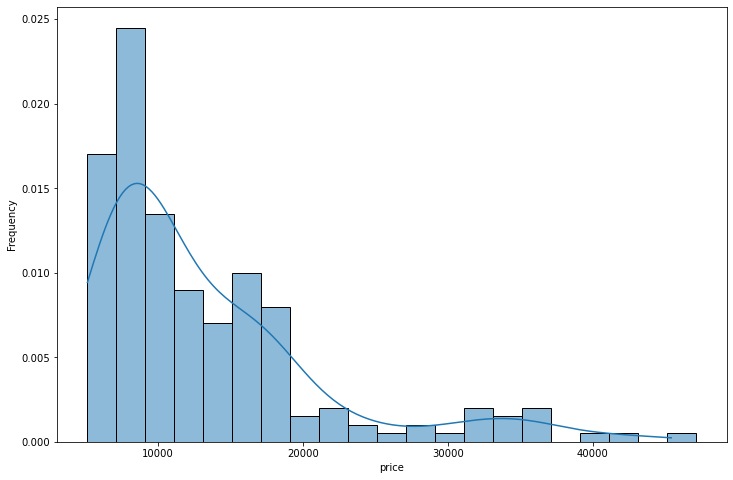

In [26]:
sns.histplot(cars, x='price', stat='frequency', binwidth=2000, kde=True)

<AxesSubplot:ylabel='price'>

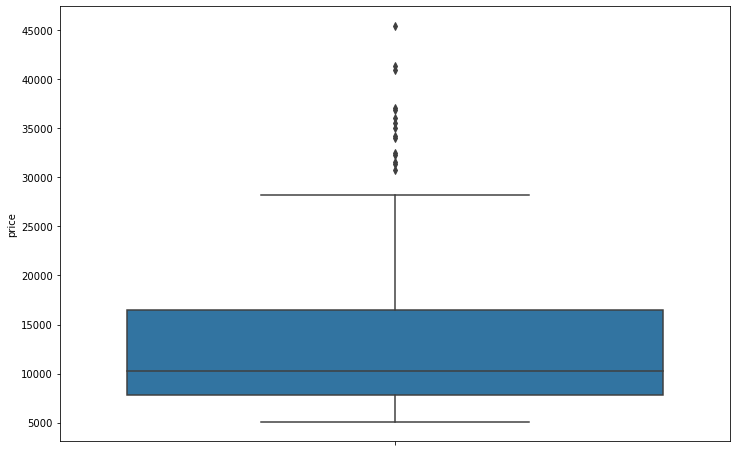

In [27]:
sns.boxplot(data=cars, y='price')

Podemos verificar que a maior parte dos carros custam menos de 20000 dólares

<AxesSubplot:xlabel='symboling', ylabel='price'>

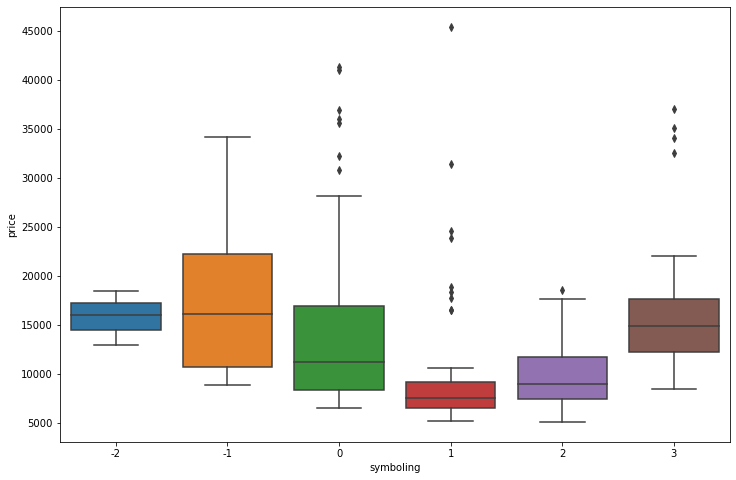

In [28]:
sns.boxplot(data=cars, x='symboling', y='price')

Os carros mais caros pertencem as categorias 0 e 1 e são outliers embora sejam preferidos os da categoria -1, onde a amplitude de preços é maior.

In [29]:
cars.brand.value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: brand, dtype: int64

Toyota é a marca com mais carros vendidos, cujo carro mais caro não chega a ter metade do preço do carro mais caro que pertence à marca Buick

In [30]:
correlation = cars.corr()
covariance = cars.cov()

<AxesSubplot:>

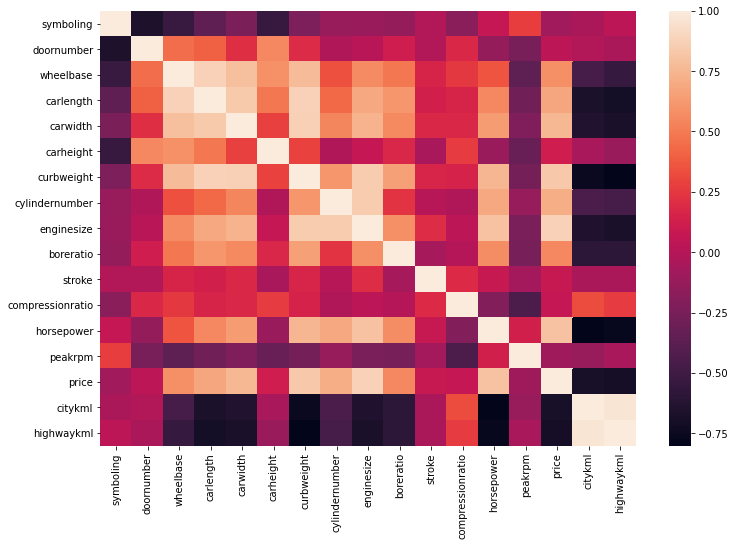

In [31]:
sns.heatmap(correlation)

Acima verificamos uma forte correlação entre a nossa variável alvo ('price') e as variáveis
'wheelbase', 'carlength', 'carwidth', 'curbweigth', 'enginesize' e 'horsepower'.
Numericamente essas correlações são:

In [32]:
positivas = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower']
negativas = ['citykml', 'highwaykml']
print('Positivas')
for i in positivas:
    val = cars['price'].corr(cars[i])
    print(f'Price x {i.title()} = {val}')
print('Negativas')
for i in negativas:
    val = cars['price'].corr(cars[i])
    print(f'Price x {i.title()} = {val}')

Positivas
Price x Wheelbase = 0.5778155982921501
Price x Carlength = 0.6829200156779621
Price x Carwidth = 0.7593252997415114
Price x Curbweight = 0.8353048793372964
Price x Enginesize = 0.874144802524512
Price x Horsepower = 0.8081388225362218
Negativas
Price x Citykml = -0.6857513360270395
Price x Highwaykml = -0.6975990916465565


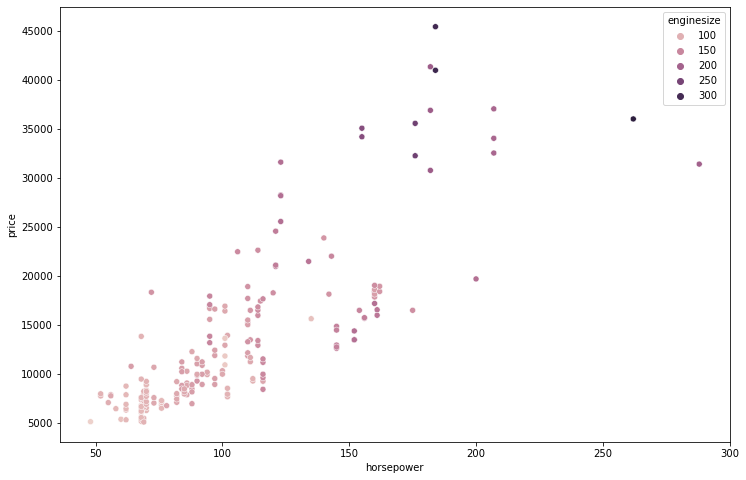

In [33]:
#Gráfico de dispersão evidenciando uma relação positiva entre price x horsepower x enginesize
#Os pontos com cores mais escuras, segundo a legenda, são motores maiores, estes possuem maior valor em
#Horsepower e em price
g = sns.scatterplot(data=cars, x='horsepower', y='price', hue='enginesize')

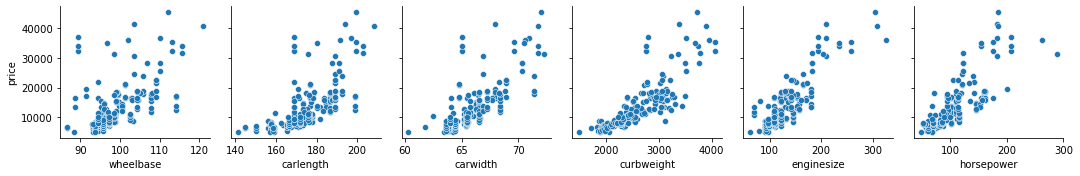

In [34]:
#Plotando as correlações positivas
sns.PairGrid(cars, x_vars=positivas, y_vars=['price']).map(sns.scatterplot)

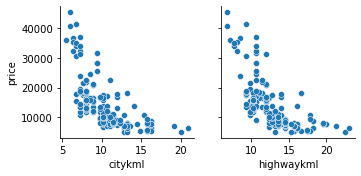

In [35]:
#Plotando as correlações negativas
sns.PairGrid(cars, x_vars=negativas, y_vars='price').map(sns.scatterplot)

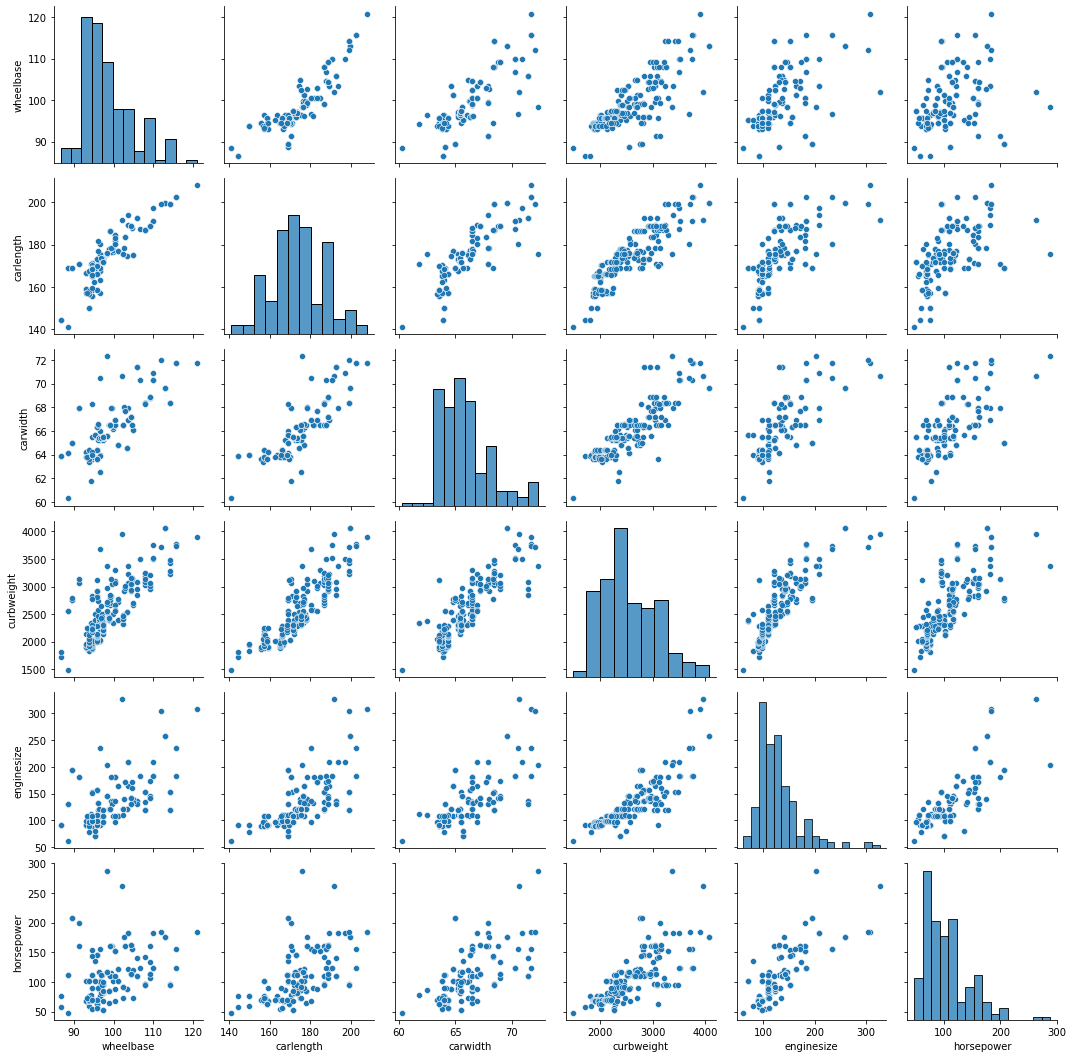

In [36]:
#Verificaremos se há uma grande correlação entre as features selecionadas
sns.PairGrid(cars, x_vars=positivas, y_vars=positivas).map_diag(sns.histplot).map_offdiag(sns.scatterplot)

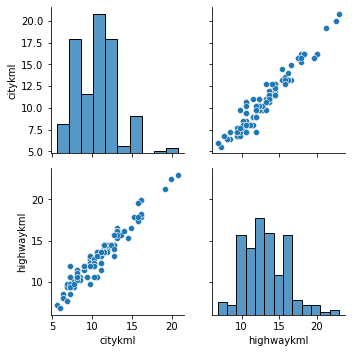

In [37]:
#Obviamente, citykml e highwaykml são extremamente correlacionados entre si já que são basicamente a mesma medida de consumo
#Uma é calculada na cidade enquanto a outra na estrada
sns.PairGrid(cars, x_vars=negativas, y_vars=negativas).map_diag(sns.histplot).map_offdiag(sns.scatterplot)

Pode-se observar que há uma grande correlação entre as features numericas selecionadas, o que pode acarretar em um problema de multicolinearidade no modelo. Iremos criar o modelo com essas features e melhorar o modelo retirando features  analisando o coeficiente de ajuste R², R² ajustado e o VIF

# Preparação de Dados

In [38]:
categorical = [i for i in cars.columns if cars[i].dtype == 'object']
categorical

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem',
 'brand']

Utilizando LabelEncoder para criar as dummies

In [39]:
from sklearn.preprocessing import LabelEncoder

df_features = pd.concat([cars[categorical], cars[positivas], cars[negativas], cars['price']], axis=1)
df_features


,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,brand,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citykml,highwaykml,price
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero,88.6,168.8,64.1,2548,130,111,8.928571,11.479592,13495.0
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero,88.6,168.8,64.1,2548,130,111,8.928571,11.479592,16500.0
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero,94.5,171.2,65.5,2823,152,154,8.078231,11.054422,16500.0
3,gas,std,sedan,fwd,front,ohc,mpfi,audi,99.8,176.6,66.2,2337,109,102,10.204082,12.755102,13950.0
4,gas,std,sedan,4wd,front,ohc,mpfi,audi,99.4,176.6,66.4,2824,136,115,7.653061,9.353741,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,front,ohc,mpfi,volvo,109.1,188.8,68.9,2952,141,114,9.778912,11.904762,16845.0
201,gas,turbo,sedan,rwd,front,ohc,mpfi,volvo,109.1,188.8,68.8,3049,141,160,8.078231,10.629252,19045.0
202,gas,std,sedan,rwd,front,ohcv,mpfi,volvo,109.1,188.8,68.9,3012,173,134,7.653061,9.778912,21485.0
203,diesel,turbo,sedan,rwd,front,ohc,idi,volvo,109.1,188.8,68.9,3217,145,106,11.054422,11.479592,22470.0


In [40]:
le = LabelEncoder()
for c in categorical:
    dummy = le.fit_transform(df_features[c])
    df_features[c] = pd.DataFrame(dummy, columns=[c])
df_features

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,brand,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citykml,highwaykml,price
0,1,0,0,2,0,0,5,0,88.6,168.8,64.1,2548,130,111,8.928571,11.479592,13495.0
1,1,0,0,2,0,0,5,0,88.6,168.8,64.1,2548,130,111,8.928571,11.479592,16500.0
2,1,0,2,2,0,5,5,0,94.5,171.2,65.5,2823,152,154,8.078231,11.054422,16500.0
3,1,0,3,1,0,3,5,1,99.8,176.6,66.2,2337,109,102,10.204082,12.755102,13950.0
4,1,0,3,0,0,3,5,1,99.4,176.6,66.4,2824,136,115,7.653061,9.353741,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,3,2,0,3,5,21,109.1,188.8,68.9,2952,141,114,9.778912,11.904762,16845.0
201,1,1,3,2,0,3,5,21,109.1,188.8,68.8,3049,141,160,8.078231,10.629252,19045.0
202,1,0,3,2,0,5,5,21,109.1,188.8,68.9,3012,173,134,7.653061,9.778912,21485.0
203,0,1,3,2,0,3,3,21,109.1,188.8,68.9,3217,145,106,11.054422,11.479592,22470.0


**Fazendo agora  a Feature Scaling**

Farei Normalization

In [41]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(df_features)
minmax_df = minmax.transform(df_features)

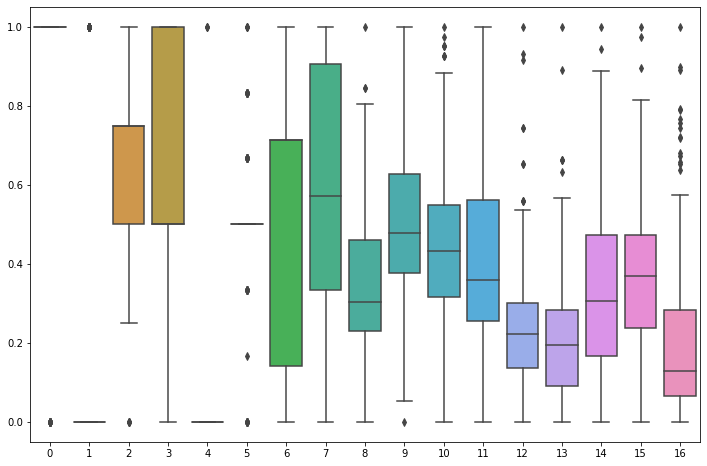

In [42]:
#Plotando os dados transformados
ax = sns.boxplot(data=minmax_df)

In [43]:
minmax_df = pd.DataFrame(minmax_df) #Criando o DataFrame a partir dos valores tranformados com MinMaxScaler

In [44]:
minmax_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.902439,0.180488,0.653659,0.663415,0.014634,0.502439,0.464808,0.580952,0.354419,0.491780,0.467317,0.414106,0.248707,0.233821,0.339431,0.388190,0.202540
std,0.297446,0.385535,0.214770,0.278085,0.120377,0.175794,0.287601,0.299370,0.175562,0.184139,0.178767,0.201971,0.157142,0.164767,0.181726,0.181222,0.198323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.500000,0.500000,0.000000,0.500000,0.142857,0.333333,0.230321,0.376119,0.316667,0.254849,0.135849,0.091667,0.166667,0.236842,0.066283
50%,1.000000,0.000000,0.750000,0.500000,0.000000,0.500000,0.714286,0.571429,0.303207,0.479104,0.433333,0.359193,0.222642,0.195833,0.305556,0.368421,0.128519
75%,1.000000,0.000000,0.750000,1.000000,0.000000,0.500000,0.714286,0.904762,0.460641,0.626866,0.550000,0.561288,0.301887,0.283333,0.472222,0.473684,0.282632
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
cols = [n for n in df_features.columns]
cols.index('price')

16

*Observamos que as colunas receberam números no lugar dos nomes das features, portanto vamos corrigir isso utilizando o atributo rename do DataFrame MinMaxScaler*

In [46]:
minmax_df.rename(columns={i:n for i in range(0, len(cars)) for n in cols if cols.index(n) == i}, inplace=True)

In [47]:
#Verificamos que a correção foi realizada com sucesso
minmax_df.columns

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'brand', 'wheelbase', 'carlength',
       'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citykml',
       'highwaykml', 'price'],
      dtype='object')

In [48]:
#Importanto as ferramentas necessárias para separar as amostras de teste e treino do modelo de Regressão Linear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

Separando as variáveis acima em teste e treino, usarei um tamanho de teste de 20%

In [49]:
def testes(y_test, y_pred):
    testes = {'R2':r2_score, 'MAE':mean_absolute_error, 'MSE':mean_squared_error}
    for label, teste in testes.items():
        print(label, teste(y_test, y_pred))

Agora, ferei a regressão linear para o MinMaxScaler

In [50]:
X = minmax_df.drop('price', axis=1)
y = minmax_df['price']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_test

78     0.038504
97     0.071521
151    0.030286
44     0.094298
40     0.128519
67     0.507274
98     0.077727
18     0.000819
152    0.034010
62     0.127278
4      0.306142
172    0.311578
197    0.282930
38     0.098729
29     0.194777
170    0.150961
190    0.120699
33     0.035028
136    0.323519
145    0.152450
173    0.095080
31     0.043121
11     0.293109
119    0.070478
169    0.120922
34     0.049923
84     0.232635
184    0.071421
120    0.027581
35     0.054044
163    0.072985
28     0.094409
16     0.898590
130    0.103694
116    0.318554
182    0.065960
27     0.085398
47     0.673551
58     0.261333
204    0.434611
138    0.000000
Name: price, dtype: float64

In [52]:
linreg = LinearRegression().fit(X_train, y_train)

In [53]:
y_pred = linreg.predict(X_test)

In [54]:
testes(y_test, y_pred)

R2 0.7960449943451412
MAE 0.057329516253576844
MSE 0.006906916141857842


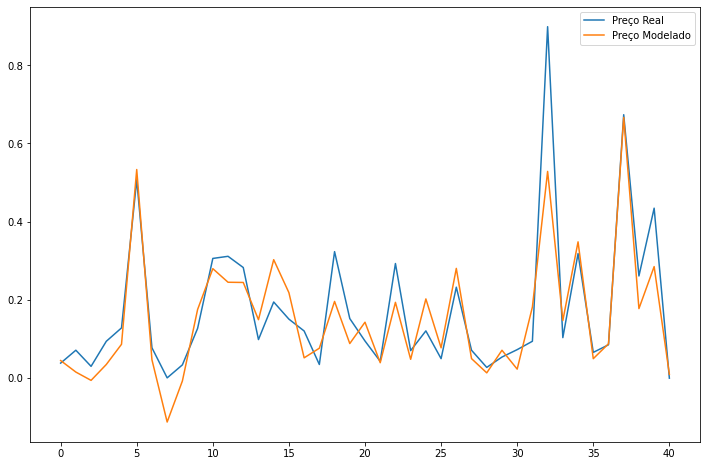

In [55]:
plt.plot(pd.DataFrame(y_test).reset_index().drop(['index'], axis=1), label='Preço Real')
plt.plot(y_pred, label='Preço Modelado')
plt.legend()
plt.show()

In [56]:
Y = minmax_df['price']
X = minmax_df.drop(['price'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

In [57]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     91.63
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           1.26e-79
Time:                        18:02:56   Log-Likelihood:                 264.17
No. Observations:                 205   AIC:                            -494.3
Df Residuals:                     188   BIC:                            -437.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1086      0.076     -1.

In [58]:
pred = model.predict(results.params)
pred_df = pd.DataFrame(pred)

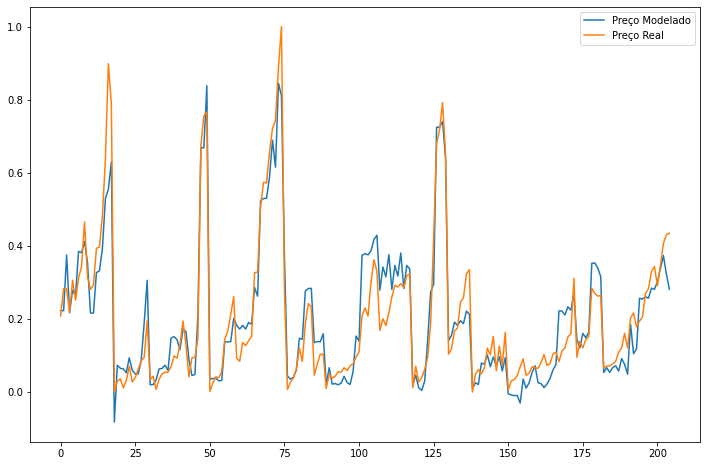

In [59]:
plt.plot(pred_df, label='Preço Modelado')
plt.plot(Y, label='Preço Real')
plt.legend()
plt.show()

Vamos fazer o teste de VIF

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif



In [61]:
x = minmax_df.drop(['price'], axis=1)
def vif_df(x):
    vif_df = pd.DataFrame([vif(x.values, i) for i in range(x.shape[1])], index=x.columns, columns=['VIF']).sort_values(by='VIF', ascending=False)
    return vif_df
def drop(x, col):
    x.drop([col], axis=1, inplace=True)
    return x

In [62]:
vif_df(X)

,VIF
const,246.407413
citykml,28.807348
highwaykml,25.676093
curbweight,17.379380
carlength,10.900194
horsepower,10.247629
enginesize,8.369777
wheelbase,7.839448
carwidth,6.639500
fueltype,2.936153


In [63]:
drop(X, 'citykml')

,const,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,brand,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,highwaykml
0,1.0,1.0,0.0,0.00,1.0,0.0,0.000000,0.714286,0.000000,0.058309,0.413433,0.316667,0.411171,0.260377,0.262500,0.289474
1,1.0,1.0,0.0,0.00,1.0,0.0,0.000000,0.714286,0.000000,0.058309,0.413433,0.316667,0.411171,0.260377,0.262500,0.289474
2,1.0,1.0,0.0,0.50,1.0,0.0,0.833333,0.714286,0.000000,0.230321,0.449254,0.433333,0.517843,0.343396,0.441667,0.263158
3,1.0,1.0,0.0,0.75,0.5,0.0,0.500000,0.714286,0.047619,0.384840,0.529851,0.491667,0.329325,0.181132,0.225000,0.368421
4,1.0,1.0,0.0,0.75,0.0,0.0,0.500000,0.714286,0.047619,0.373178,0.529851,0.508333,0.518231,0.283019,0.279167,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,1.0,0.0,0.75,1.0,0.0,0.500000,0.714286,1.000000,0.655977,0.711940,0.716667,0.567882,0.301887,0.275000,0.315789
201,1.0,1.0,1.0,0.75,1.0,0.0,0.500000,0.714286,1.000000,0.655977,0.711940,0.708333,0.605508,0.301887,0.466667,0.236842
202,1.0,1.0,0.0,0.75,1.0,0.0,0.833333,0.714286,1.000000,0.655977,0.711940,0.716667,0.591156,0.422642,0.358333,0.184211
203,1.0,0.0,1.0,0.75,1.0,0.0,0.500000,0.428571,1.000000,0.655977,0.711940,0.716667,0.670675,0.316981,0.241667,0.289474


In [64]:
vif_df(X)

,VIF
const,237.143619
curbweight,17.360939
carlength,10.159556
horsepower,9.264364
enginesize,7.680067
wheelbase,7.613049
carwidth,6.639496
highwaykml,6.326808
fueltype,2.884925
fuelsystem,2.310139


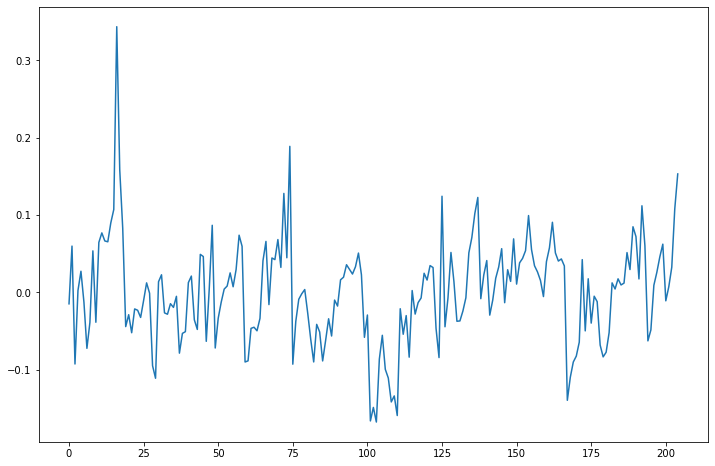

In [65]:
plt.plot(results.resid)

In [66]:
drop(X, 'curbweight')

,const,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,brand,wheelbase,carlength,carwidth,enginesize,horsepower,highwaykml
0,1.0,1.0,0.0,0.00,1.0,0.0,0.000000,0.714286,0.000000,0.058309,0.413433,0.316667,0.260377,0.262500,0.289474
1,1.0,1.0,0.0,0.00,1.0,0.0,0.000000,0.714286,0.000000,0.058309,0.413433,0.316667,0.260377,0.262500,0.289474
2,1.0,1.0,0.0,0.50,1.0,0.0,0.833333,0.714286,0.000000,0.230321,0.449254,0.433333,0.343396,0.441667,0.263158
3,1.0,1.0,0.0,0.75,0.5,0.0,0.500000,0.714286,0.047619,0.384840,0.529851,0.491667,0.181132,0.225000,0.368421
4,1.0,1.0,0.0,0.75,0.0,0.0,0.500000,0.714286,0.047619,0.373178,0.529851,0.508333,0.283019,0.279167,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,1.0,0.0,0.75,1.0,0.0,0.500000,0.714286,1.000000,0.655977,0.711940,0.716667,0.301887,0.275000,0.315789
201,1.0,1.0,1.0,0.75,1.0,0.0,0.500000,0.714286,1.000000,0.655977,0.711940,0.708333,0.301887,0.466667,0.236842
202,1.0,1.0,0.0,0.75,1.0,0.0,0.833333,0.714286,1.000000,0.655977,0.711940,0.716667,0.422642,0.358333,0.184211
203,1.0,0.0,1.0,0.75,1.0,0.0,0.500000,0.428571,1.000000,0.655977,0.711940,0.716667,0.316981,0.241667,0.289474


In [67]:
def plot(Y, X):
    model = sm.OLS(Y, X)
    results = model.fit()
    print(results.summary())
    pred = model.predict(results.params)
    plt.plot(pred, label='Preço Modelado')
    plt.plot(Y, label='Preço Real')
    plt.legend()
    plt.show()
    return results

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     103.1
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           1.05e-80
Time:                        18:02:59   Log-Likelihood:                 261.80
No. Observations:                 205   AIC:                            -493.6
Df Residuals:                     190   BIC:                            -443.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0448      0.070     -0.

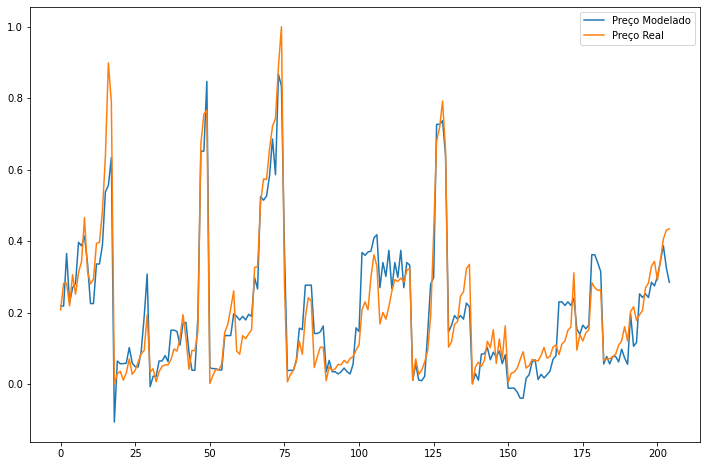

In [68]:
plot(Y, X)

In [69]:
vif_df(X)

,VIF
const,204.457875
carlength,9.470819
horsepower,9.117660
wheelbase,7.562620
carwidth,6.450513
enginesize,5.909746
highwaykml,5.019116
fueltype,2.505170
fuelsystem,2.310107
drivewheel,2.012784


In [70]:
drop(X, 'carlength')
vif_df(X)

,VIF
const,183.408218
horsepower,9.043386
wheelbase,6.386333
carwidth,5.785954
enginesize,5.751249
highwaykml,4.238323
fueltype,2.450617
fuelsystem,2.211026
drivewheel,2.011304
aspiration,1.939168


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     111.3
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           1.22e-81
Time:                        18:03:00   Log-Likelihood:                 261.55
No. Observations:                 205   AIC:                            -495.1
Df Residuals:                     191   BIC:                            -448.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0295      0.066     -0.

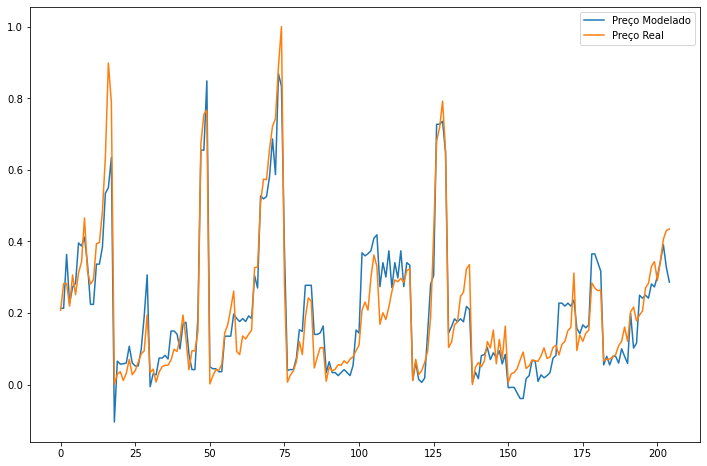

In [71]:
plot(Y, X)

In [72]:
drop(X, 'horsepower')
vif_df(X)

,VIF
const,181.341814
carwidth,4.860764
wheelbase,4.753451
highwaykml,3.939060
enginesize,3.181780
fuelsystem,2.092184
fueltype,2.022481
drivewheel,1.785296
carbody,1.646991
aspiration,1.615479


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     113.0
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           4.04e-80
Time:                        18:03:00   Log-Likelihood:                 255.19
No. Observations:                 205   AIC:                            -484.4
Df Residuals:                     192   BIC:                            -441.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0541      0.068     -0.

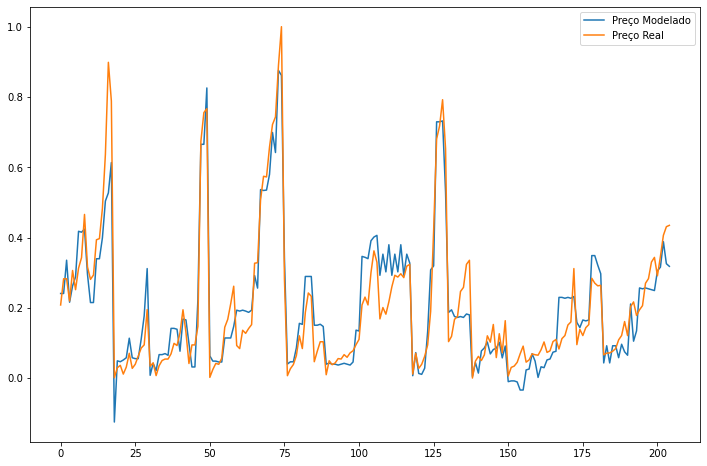

In [73]:
results = plot(Y, X)

podemos notar alguns outliers que parecem estar interferindo no modelo

In [74]:
outliers = [minmax_df.price.mean() + 3*minmax_df.price.std(), minmax_df.price.mean() - 3*minmax_df.price.std()]
outliers

[0.7975092489439739, -0.39242953240896017]

In [75]:
retirar = [i for i in minmax_df.loc[minmax_df.price >= outliers[0]].index]

In [76]:
minmax_df.loc[minmax_df.price >= outliers[0]]

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,brand,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citykml,highwaykml,price
16,1.0,0.0,0.75,1.0,0.0,0.500000,0.714286,0.095238,0.492711,0.786567,0.633333,0.733902,0.558491,0.558333,0.083333,0.157895,0.898590
73,1.0,0.0,0.75,1.0,0.0,0.833333,0.714286,0.142857,1.000000,1.000000,0.950000,0.935609,0.932075,0.566667,0.027778,0.000000,0.889777
74,1.0,0.0,0.25,1.0,0.0,0.833333,0.714286,0.142857,0.740525,0.867164,0.975000,0.863848,0.916981,0.566667,0.027778,0.000000,1.000000


In [77]:
depois = minmax_df.drop(retirar)

In [78]:
depois.loc[depois.price >= outliers[0]]

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,brand,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citykml,highwaykml,price


In [79]:
X = depois.drop(['price'], axis=1)
X = sm.add_constant(X)
Y = depois['price']

In [80]:
vif_df(X)

,VIF
const,243.527045
citykml,27.810985
highwaykml,24.514668
curbweight,17.557700
carlength,10.313772
horsepower,9.800643
enginesize,8.021516
wheelbase,7.571632
carwidth,6.233973
fueltype,2.945838


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     91.41
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           9.72e-79
Time:                        18:03:02   Log-Likelihood:                 282.76
No. Observations:                 202   AIC:                            -531.5
Df Residuals:                     185   BIC:                            -475.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0919      0.068     -1.

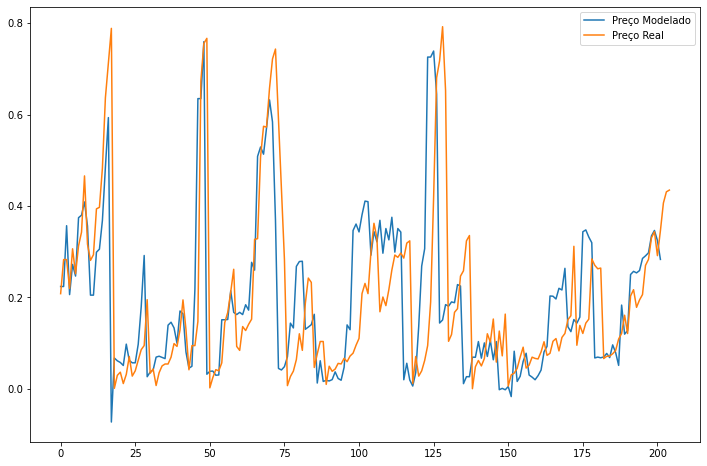

In [81]:
results = plot(Y, X)

In [82]:
drop(X, 'citykml')
vif_df(X)

,VIF
const,234.266452
curbweight,17.554947
carlength,9.603142
horsepower,8.907900
enginesize,7.582269
wheelbase,7.396981
carwidth,6.233972
highwaykml,6.031216
fueltype,2.891780
fuelsystem,2.286264


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     98.00
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           9.86e-80
Time:                        18:03:02   Log-Likelihood:                 282.73
No. Observations:                 202   AIC:                            -533.5
Df Residuals:                     186   BIC:                            -480.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0890      0.067     -1.

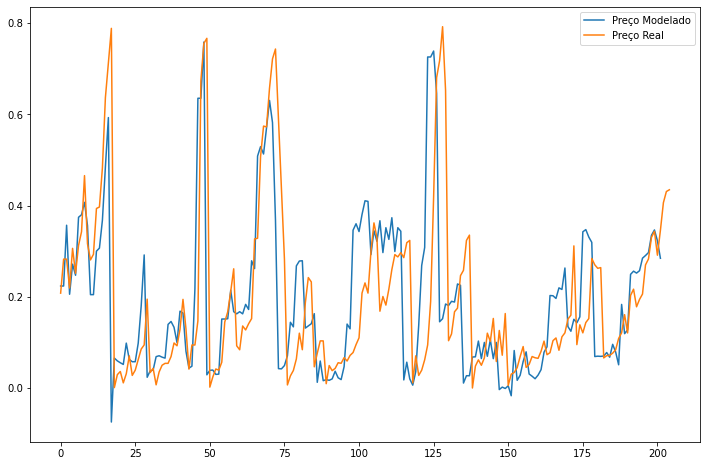

In [83]:
plot(Y, X)

In [84]:
drop(X, 'curbweight')
vif_df(X)

,VIF
const,205.748497
carlength,8.950476
horsepower,8.826954
wheelbase,7.249292
carwidth,6.094825
enginesize,5.386210
highwaykml,4.811849
fueltype,2.573892
fuelsystem,2.286170
aspiration,2.001349


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     98.88
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           2.01e-78
Time:                        18:03:03   Log-Likelihood:                 276.89
No. Observations:                 202   AIC:                            -523.8
Df Residuals:                     187   BIC:                            -474.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0112      0.064     -0.

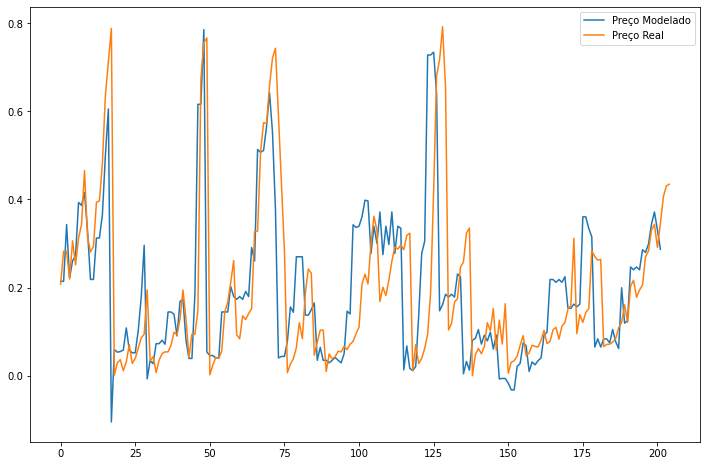

In [85]:
plot(Y, X)

In [86]:
drop(X, 'carlength')
vif_df(X)

,VIF
const,185.520409
horsepower,8.730498
wheelbase,6.130106
carwidth,5.457589
enginesize,5.241582
highwaykml,4.068115
fueltype,2.526834
fuelsystem,2.186854
drivewheel,1.987245
aspiration,1.948470


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           1.91e-79
Time:                        18:03:04   Log-Likelihood:                 276.89
No. Observations:                 202   AIC:                            -525.8
Df Residuals:                     188   BIC:                            -479.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0090      0.061     -0.

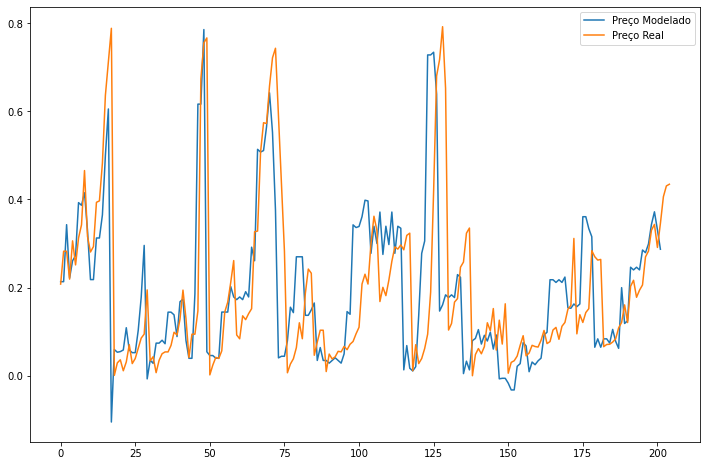

In [87]:
plot(Y, X)

In [88]:
drop(X, 'horsepower')
vif_df(X)

,VIF
const,182.871173
wheelbase,4.782794
carwidth,4.622823
highwaykml,3.808752
enginesize,2.976010
fuelsystem,2.074727
fueltype,2.060404
drivewheel,1.785609
carbody,1.704708
aspiration,1.612575


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     107.7
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           1.19e-77
Time:                        18:03:04   Log-Likelihood:                 269.85
No. Observations:                 202   AIC:                            -513.7
Df Residuals:                     189   BIC:                            -470.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0359      0.063     -0.

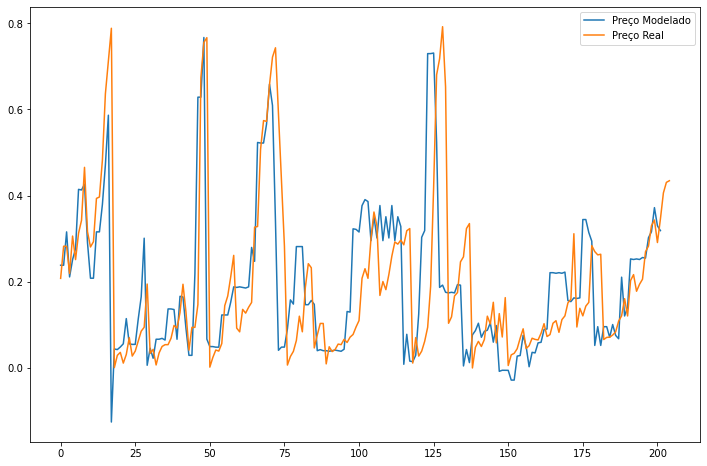

In [89]:
results = plot(Y, X)

<AxesSubplot:ylabel='Count'>

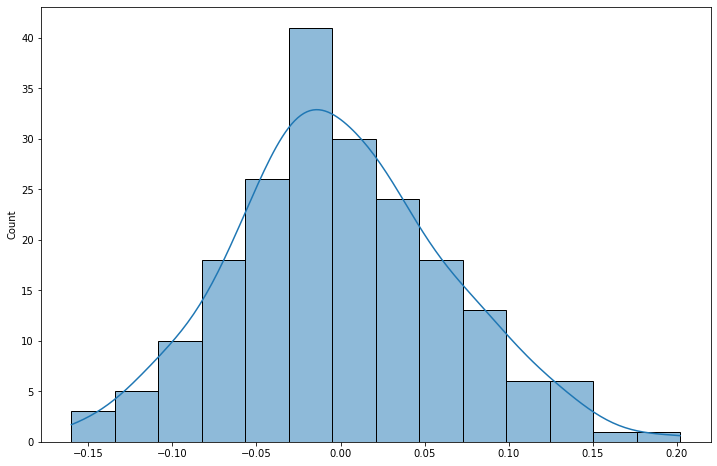

In [90]:
sns.histplot(results.resid, kde=True)

In [91]:
X.corr()

,const,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,brand,wheelbase,carwidth,enginesize,highwaykml
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltype,NaN,1.000000,-0.400081,-0.147802,-0.139830,0.040702,0.078017,0.037524,-0.048506,-0.335662,-0.255117,-0.097365,-0.187576
aspiration,NaN,-0.400081,1.000000,0.061436,0.075878,-0.058142,-0.096083,0.296298,0.000745,0.287439,0.329701,0.149055,-0.275278
carbody,NaN,-0.147802,0.061436,1.000000,-0.152980,-0.280354,-0.024365,-0.061784,0.097283,0.437077,0.158014,-0.054090,-0.020276
drivewheel,NaN,-0.139830,0.075878,-0.152980,1.000000,0.151745,-0.143496,0.415904,-0.030094,0.445777,0.455315,0.521760,-0.435263
enginelocation,NaN,0.040702,-0.058142,-0.280354,0.151745,1.000000,0.118505,0.108166,0.052576,-0.193091,-0.049839,0.227677,-0.108344
enginetype,NaN,0.078017,-0.096083,-0.024365,-0.143496,0.118505,1.000000,-0.110540,-0.056411,-0.203598,-0.041770,-0.044962,-0.040297
fuelsystem,NaN,0.037524,0.296298,-0.061784,0.415904,0.108166,-0.110540,1.000000,0.126558,0.375987,0.517588,0.527733,-0.642685
brand,NaN,-0.048506,0.000745,0.097283,-0.030094,0.052576,-0.056411,0.126558,1.000000,0.038350,-0.059366,-0.109401,0.081148
wheelbase,NaN,-0.335662,0.287439,0.437077,0.445777,-0.193091,-0.203598,0.375987,0.038350,1.000000,0.779288,0.512891,-0.514713


<AxesSubplot:>

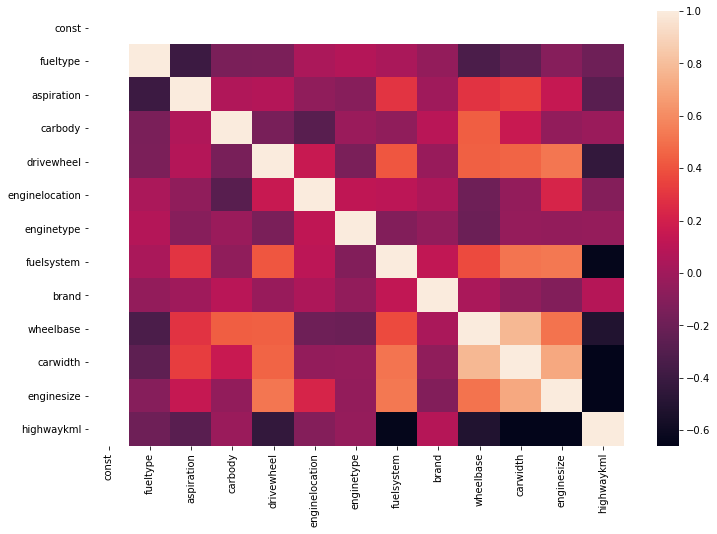

In [92]:
sns.heatmap(X.corr())

Pelo teste de Durbin-Watson, ainda há uma grande colinearidade nos dados, podemos ver uma alta correlação entre carwidth e wheelbase e também enginesize e carwidth, mas levando em consideração o VIF, vamos retirar wheelbase e verificar os resultados

In [93]:
drop(X, 'highwaykml')
vif_df(X)

,VIF
const,58.152904
wheelbase,4.527936
carwidth,4.508426
enginesize,2.758862
fuelsystem,1.857602
drivewheel,1.769920
carbody,1.704322
aspiration,1.439964
fueltype,1.418103
enginelocation,1.302905


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     115.7
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           5.74e-78
Time:                        18:03:07   Log-Likelihood:                 268.05
No. Observations:                 202   AIC:                            -512.1
Df Residuals:                     190   BIC:                            -472.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1310      0.036     -3.

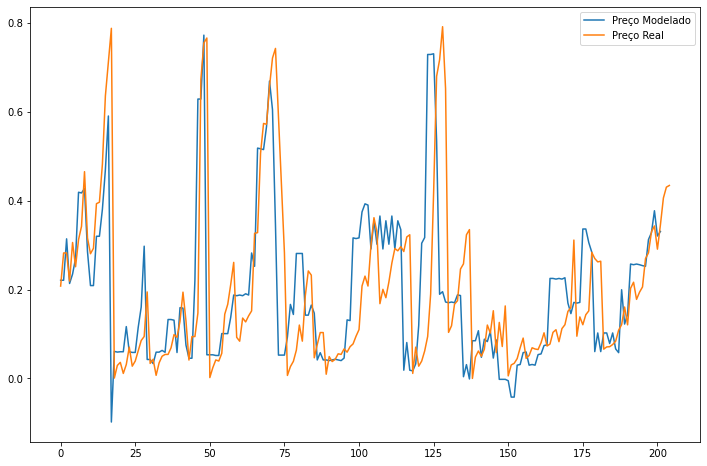

In [94]:
results = plot(Y, X)

<AxesSubplot:ylabel='Count'>

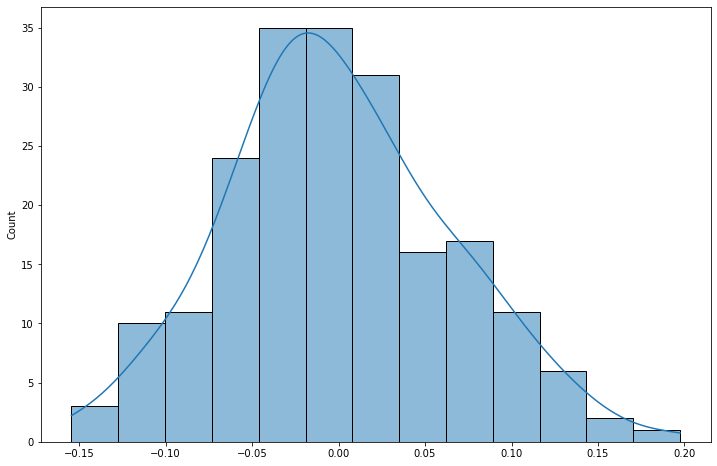

In [95]:
sns.histplot(results.resid, kde=True)

<AxesSubplot:>

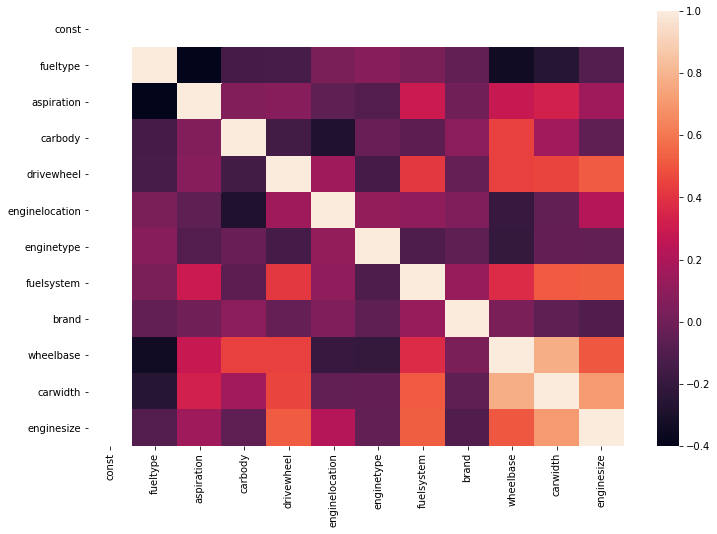

In [96]:
sns.heatmap(X.corr())

In [97]:
drop(X, 'wheelbase')
vif_df(X)

,VIF
const,57.000353
carwidth,2.874455
enginesize,2.757742
fuelsystem,1.856341
drivewheel,1.577428
aspiration,1.439848
fueltype,1.384972
enginelocation,1.267570
carbody,1.216062
brand,1.108046


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     127.0
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           9.33e-79
Time:                        18:03:09   Log-Likelihood:                 267.37
No. Observations:                 202   AIC:                            -512.7
Df Residuals:                     191   BIC:                            -476.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1367      0.035     -3.

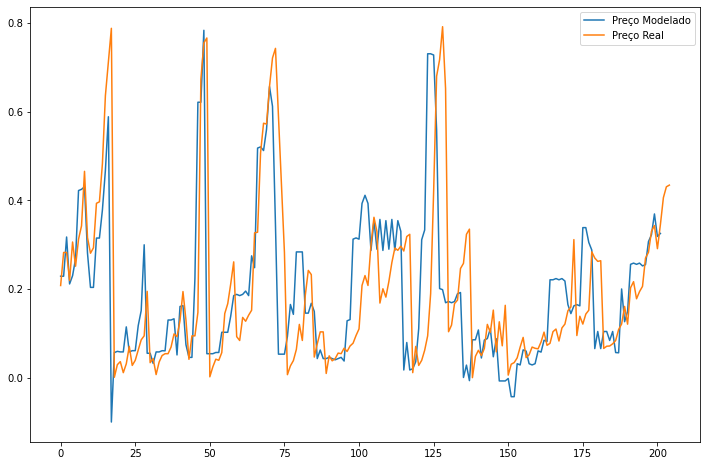

In [98]:
results = plot(Y, X)

<AxesSubplot:>

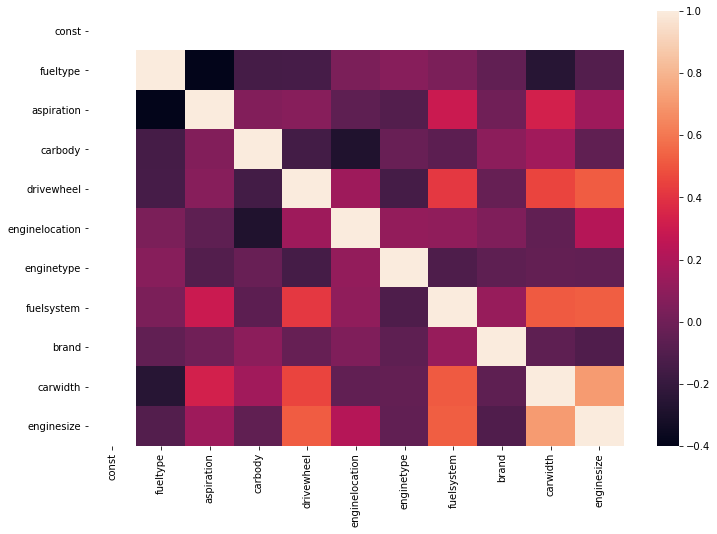

In [99]:
sns.heatmap(X.corr())

In [100]:
drop(X, 'carwidth')
vif_df(X)

,VIF
const,54.831225
enginesize,1.795246
fuelsystem,1.773986
drivewheel,1.539999
aspiration,1.394775
fueltype,1.346165
enginelocation,1.184574
carbody,1.152784
brand,1.106690
enginetype,1.057010


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     101.6
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           4.08e-68
Time:                        18:03:10   Log-Likelihood:                 238.77
No. Observations:                 202   AIC:                            -457.5
Df Residuals:                     192   BIC:                            -424.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0824      0.040     -2.

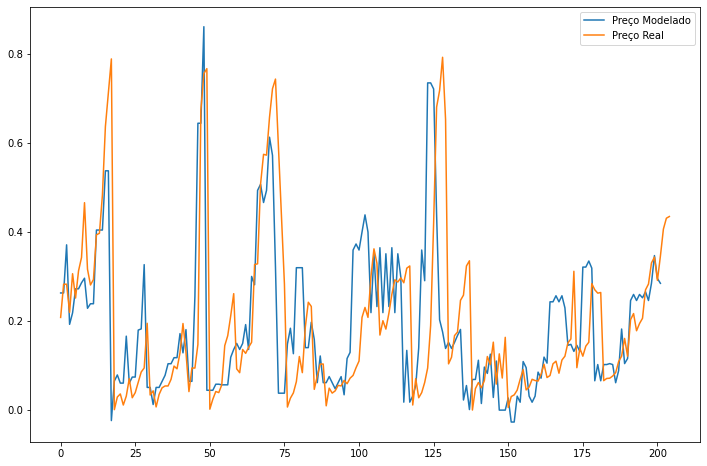

In [101]:
results = plot(Y, X)

<AxesSubplot:ylabel='Count'>

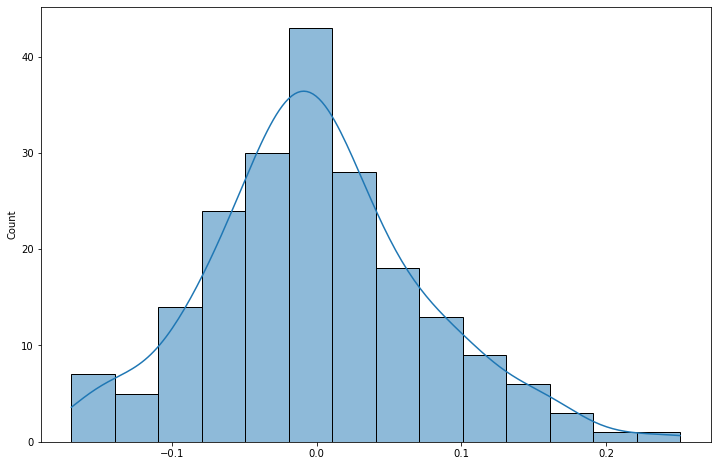

In [102]:
sns.histplot(results.resid, kde=True)

Temos um modelo com um ajuste bom, com erros normalmente distribuídos (aproximadamente), vamos construir o modelo preditivo com sklearn

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [104]:
linreg = LinearRegression().fit(X_train, y_train)

In [105]:
linreg.coef_

array([ 0.        , -0.0165162 ,  0.04566376,  0.05640479,  0.0829101 ,
        0.35831489,  0.02564536,  0.07576947, -0.09214466,  0.79777185])

In [106]:
y_pred = linreg.predict(X_test)

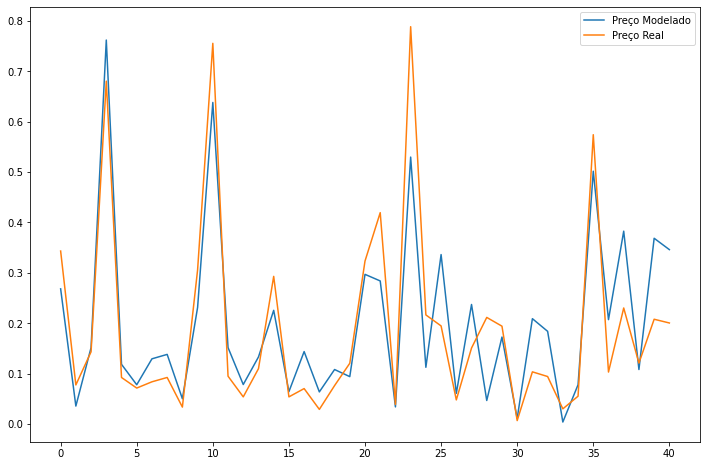

In [107]:
plt.plot(y_pred, label='Preço Modelado')
plt.plot(pd.DataFrame(y_test).reset_index().drop(['index'], axis=1), label='Preço Real')
plt.legend()
plt.show()

In [108]:
testes(y_pred, y_test)

R2 0.7315826177425276
MAE 0.06685297921853585
MSE 0.0076801338363169215


Com o nosso modelo pronto, podemos responder as questões iniciais:

- Quais variáveis são significativas na previsão do preço de um carro

    - enginesize
    - fuelsystem
    - drivewheel
    - aspiration
    - fueltype
    - enginelocation
    - carbody
    - brand
    - enginetype

- Quão bem essas variáveis descrevem o preço de um carro
    - Podemos levar em consideração o nível de ajuste R² e que as medidas de erro estão próximas de 0